In [1]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
from sklearn.metrics import plot_confusion_matrix

from utils import load_dataset, compute_performance_metrics, print_metrics_summary

In [2]:
x_train, x_test, y_train, y_test = load_dataset()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(382646, 243) (382646,)
(97300, 243) (97300,)


In [3]:
gr = GradientBoostingClassifier(n_iter_no_change=10)

In [4]:
gr.fit(x_train, y_train)

GradientBoostingClassifier(n_iter_no_change=10)

In [5]:
y_pred = gr.predict(x_test)
y_pred_proba = gr.predict_proba(x_test)

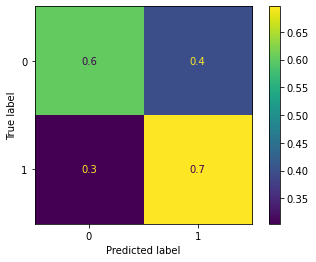

In [6]:
plot_confusion_matrix(gr, x_test, y_test, normalize="true")

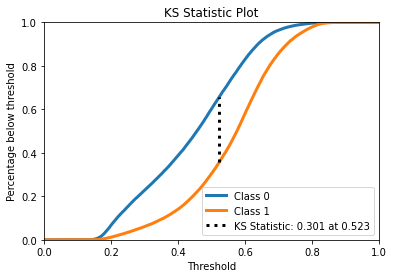


Accuracy:         0.6343
Recall:           0.6958
Precision:        0.4789
F1:               0.5673
AUROC:            0.7063
AUPR:             0.5453


In [8]:
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, y_pred, y_pred_proba)
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

In [9]:
gr1 = GradientBoostingClassifier(n_iter_no_change=10, n_estimators=200)

In [10]:
gr1.fit(x_train, y_train)

GradientBoostingClassifier(n_estimators=200, n_iter_no_change=10)

In [11]:
y_pred = gr1.predict(x_test)
y_pred_proba = gr1.predict_proba(x_test)

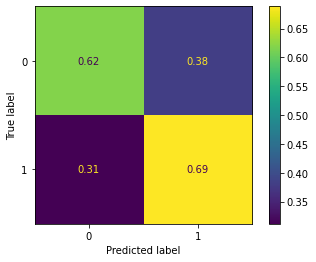

In [12]:
plot_confusion_matrix(gr1, x_test, y_test, normalize="true")

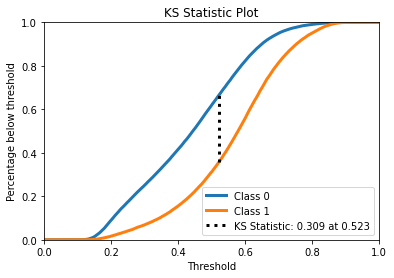


Accuracy:         0.6425
Recall:           0.6886
Precision:        0.4867
F1:               0.5703
AUROC:            0.7107
AUPR:             0.5509


In [13]:
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, y_pred, y_pred_proba)
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

In [14]:
gr2 = GradientBoostingClassifier(n_iter_no_change=10, n_estimators=300)

In [15]:
gr2.fit(x_train, y_train)

GradientBoostingClassifier(n_estimators=300, n_iter_no_change=10)

In [16]:
y_pred = gr2.predict(x_test)
y_pred_proba = gr2.predict_proba(x_test)

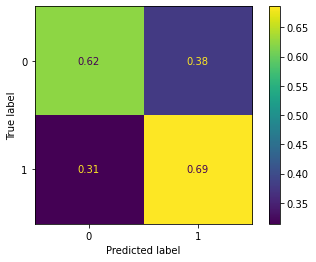

In [17]:
plot_confusion_matrix(gr2, x_test, y_test, normalize="true")

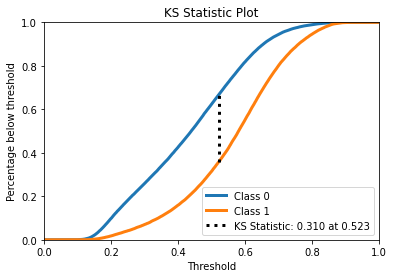


Accuracy:         0.6447
Recall:           0.6857
Precision:        0.4889
F1:               0.5708
AUROC:            0.7125
AUPR:             0.5530


In [18]:
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, y_pred, y_pred_proba)
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

In [4]:
gr3 = GradientBoostingClassifier(n_iter_no_change=10, n_estimators=300, subsample=.5)

In [5]:
gr3.fit(x_train, y_train)

GradientBoostingClassifier(n_estimators=300, n_iter_no_change=10, subsample=0.5)

In [6]:
y_pred = gr3.predict(x_test)
y_pred_proba = gr3.predict_proba(x_test)

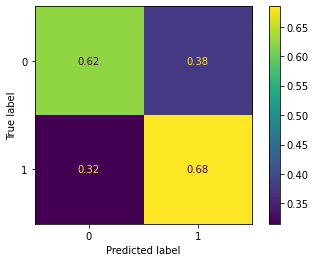

In [7]:
plot_confusion_matrix(gr3, x_test, y_test, normalize="true")

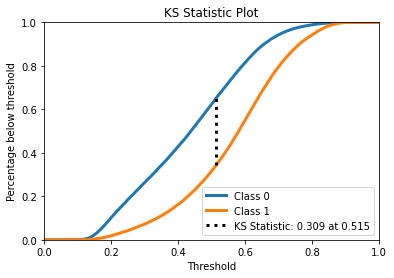


Accuracy:         0.6440
Recall:           0.6846
Precision:        0.4882
F1:               0.5699
AUROC:            0.7113
AUPR:             0.5514


In [8]:
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, y_pred, y_pred_proba)
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

In [3]:
gr4 = GradientBoostingClassifier(n_iter_no_change=10, n_estimators=300, subsample=.7)

In [4]:
gr4.fit(x_train, y_train)

GradientBoostingClassifier(n_estimators=300, n_iter_no_change=10, subsample=0.7)

In [5]:
y_pred = gr4.predict(x_test)
y_pred_proba = gr4.predict_proba(x_test)

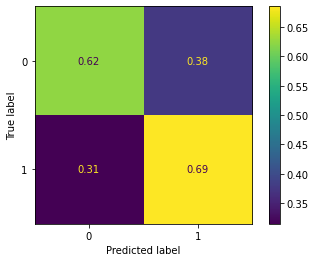

In [7]:
plot_confusion_matrix(gr4, x_test, y_test, normalize="true")

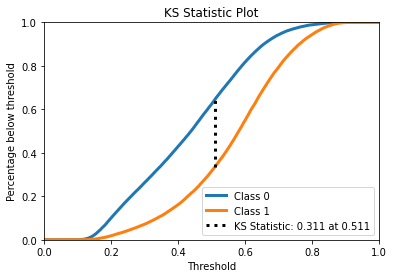


Accuracy:         0.6449
Recall:           0.6855
Precision:        0.4891
F1:               0.5709
AUROC:            0.7123
AUPR:             0.5525


In [8]:
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, y_pred, y_pred_proba)
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)